# Titanic Prediction
## 1. Project Description

* Purpose: Build supervised models on Titanic dataset and predict whether passengers will survive or not
* Methods: Build with models of Logistic regress and Random Forest
* Evaluation: Compare the models of Logistic regress and Random Forest with accuracy, performance and others.


## 2. Data description 
***Data source: https://www.kaggle.com/datasets/pavlofesenko/titanic-extended***

This is a classic Titanic dataset extended with the features from the Titanic passenger list on Wikipedia available as of February 2019. It contains ***1309 entries*** and ***21 features*** in total.

The first 12 features in this dataset are the same as in the Titanic competition [kaggle](https://www.kaggle.com/). 

|Varaible   | Definition  | Key|
| :------------- |:-------------| :-----|
|survival	|Survival	|0 = No, 1 = Yes|
|pclass	|Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex	|Sex	||
|Age	|Age in years	||
|sibsp	|# of siblings / spouses aboard the Titanic	||
|parch	|# of parents / children aboard the Titanic||	
|ticket	|Ticket number	| |
|fare	|Passenger fare	| |
|cabin	|Cabin number	| |
|embarked	|Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton|

The last 9 features are added from the [Titanic passenger list on Wikipedia](https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic) and are as follows:
* WikiId
* Name
* Age
* Hometown
* Boarded
* Destination
* Lifeboat
* Body
* Class


The new features are very similar to the original ones but they are more up-to-date and have much fewer missing values. Therefore, users can decide on the preferred features themselves.



In [1]:
# importing all the required libraries
import math
import pickle

from math import exp
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

##### Load the dataset and understand the dataset

There are actually three files from the data source, which are fill.csv, train.csv and test.csv, but I think only the fill.csv is enough for this task.

* Simplicity - Full.csv contain all the data including those in train.csv and test.csv
* Flexibility - You can split the data set many times and even in different proportions for specific task.


In [2]:
df = pd.read_csv("full.csv")

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


##### Identify categorical and numerical features/variables

In [4]:
# find categorical features
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical features\n'.format(len(categorical)))

print('The categorical features are :', categorical)


There are 11 categorical features

The categorical features are : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Name_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body']


##### There are 11 categorical features including 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Name_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat'  and 'Body.

In [5]:
# find numerical features

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical features\n'.format(len(numerical)))

print('The numerical features are :', numerical)

There are 10 numerical features

The numerical features are : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'WikiId', 'Age_wiki', 'Class']


##### There are 10 categorical features including 'PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'WikiId', 'Age_wiki' and 'Class'.

## 3. Data Cleaning


### 3.1 Drop duplicated collume/features
As the feathers added from wikipedia are more up-to-date and have less missing value, I just choose to drop the duplicated features from original dataset.

|Original | Extended from wikipedia|
|:--------|:----------|
|Pclass|Class|
|Name|Name_wiki|
|Age|Age_wiki|
|Embarked|Boarded|

In [6]:
duplicated_features = ['Pclass', 'Name', 'Age', 'Embarked']
df = df.drop(duplicated_features, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Sex          1309 non-null   object 
 3   SibSp        1309 non-null   int64  
 4   Parch        1309 non-null   int64  
 5   Ticket       1309 non-null   object 
 6   Fare         1308 non-null   float64
 7   Cabin        295 non-null    object 
 8   WikiId       1304 non-null   float64
 9   Name_wiki    1304 non-null   object 
 10  Age_wiki     1302 non-null   float64
 11  Hometown     1304 non-null   object 
 12  Boarded      1304 non-null   object 
 13  Destination  1304 non-null   object 
 14  Lifeboat     502 non-null    object 
 15  Body         130 non-null    object 
 16  Class        1304 non-null   float64
dtypes: float64(5), int64(3), object(9)
memory usage: 174.0+ KB


### 3.2 Check propotion of null value in each features


Index(['PassengerId', 'Survived', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'WikiId', 'Name_wiki', 'Age_wiki', 'Hometown', 'Boarded',
       'Destination', 'Lifeboat', 'Body', 'Class'],
      dtype='object')
['PassengerId', 'Survived', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'WikiId', 'Name_wiki', 'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body', 'Class']
[0.0, 0.31932773109243695, 0.0, 0.0, 0.0, 0.0, 0.0007639419404125286, 0.774637127578304, 0.0038197097020626434, 0.0038197097020626434, 0.0053475935828877, 0.0038197097020626434, 0.0038197097020626434, 0.0038197097020626434, 0.6165011459129106, 0.9006875477463713, 0.0038197097020626434]


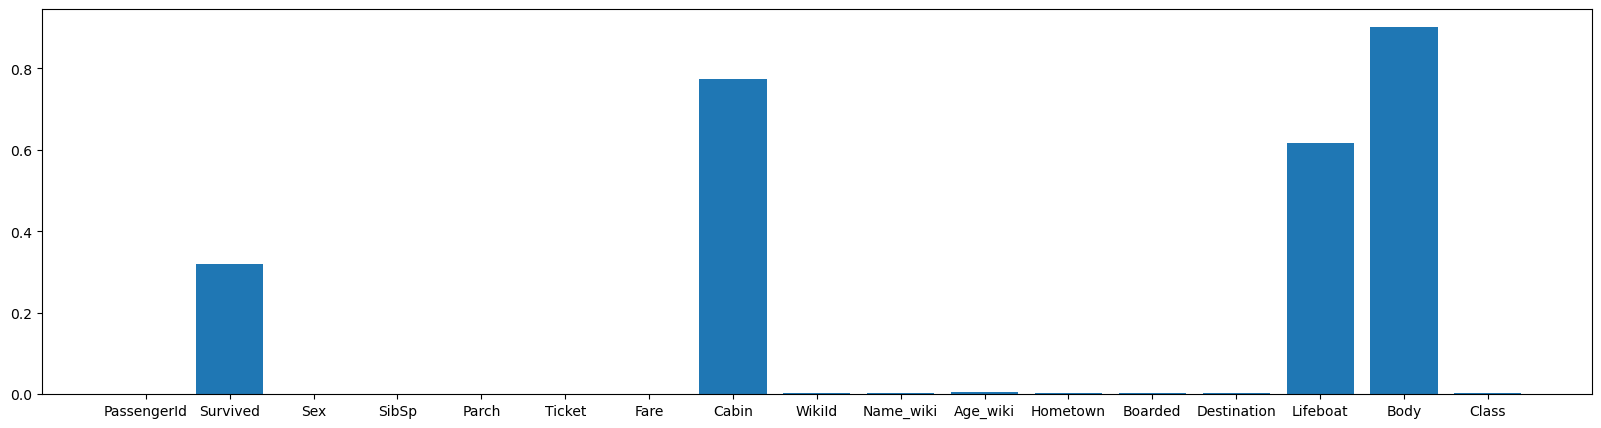

In [7]:
print(df.columns)
propotions = []
features = []
for var in df.columns:
    p = df[var].isnull().sum()  / len(df[var])
    propotions.append(p)
    features.append(var)
    #print("Feature: {}  null value propotion:{}".format(var, p))
print(features)
print(propotions)

fig = plt.figure(figsize = (20, 5))
plt.bar(features, propotions)
plt.show()


As we can see, over 50% of entries if Cabin, Lifeboat and Body is null, so we can just drop thoes features.

And then drop all na value making the dataset more clean.

In [8]:
null_features = ['Cabin', 'Lifeboat', 'Body']
df = df.drop(null_features, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Sex          1309 non-null   object 
 3   SibSp        1309 non-null   int64  
 4   Parch        1309 non-null   int64  
 5   Ticket       1309 non-null   object 
 6   Fare         1308 non-null   float64
 7   WikiId       1304 non-null   float64
 8   Name_wiki    1304 non-null   object 
 9   Age_wiki     1302 non-null   float64
 10  Hometown     1304 non-null   object 
 11  Boarded      1304 non-null   object 
 12  Destination  1304 non-null   object 
 13  Class        1304 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 143.3+ KB


In [9]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  887 non-null    int64  
 1   Survived     887 non-null    float64
 2   Sex          887 non-null    object 
 3   SibSp        887 non-null    int64  
 4   Parch        887 non-null    int64  
 5   Ticket       887 non-null    object 
 6   Fare         887 non-null    float64
 7   WikiId       887 non-null    float64
 8   Name_wiki    887 non-null    object 
 9   Age_wiki     887 non-null    float64
 10  Hometown     887 non-null    object 
 11  Boarded      887 non-null    object 
 12  Destination  887 non-null    object 
 13  Class        887 non-null    float64
dtypes: float64(5), int64(3), object(6)
memory usage: 103.9+ KB


### 3.3 Drop the features not helpful for this task


In [10]:
categorical = [var for var in df.columns if df[var].dtype=='O']
numerical = [var for var in df.columns if df[var].dtype!='O']
print('The categorical features are :', categorical)
print('The numerical features are :', numerical)

The categorical features are : ['Sex', 'Ticket', 'Name_wiki', 'Hometown', 'Boarded', 'Destination']
The numerical features are : ['PassengerId', 'Survived', 'SibSp', 'Parch', 'Fare', 'WikiId', 'Age_wiki', 'Class']


df.shape (887, 14)
nCol:14 nGrapShown:18 nGraphRow:5


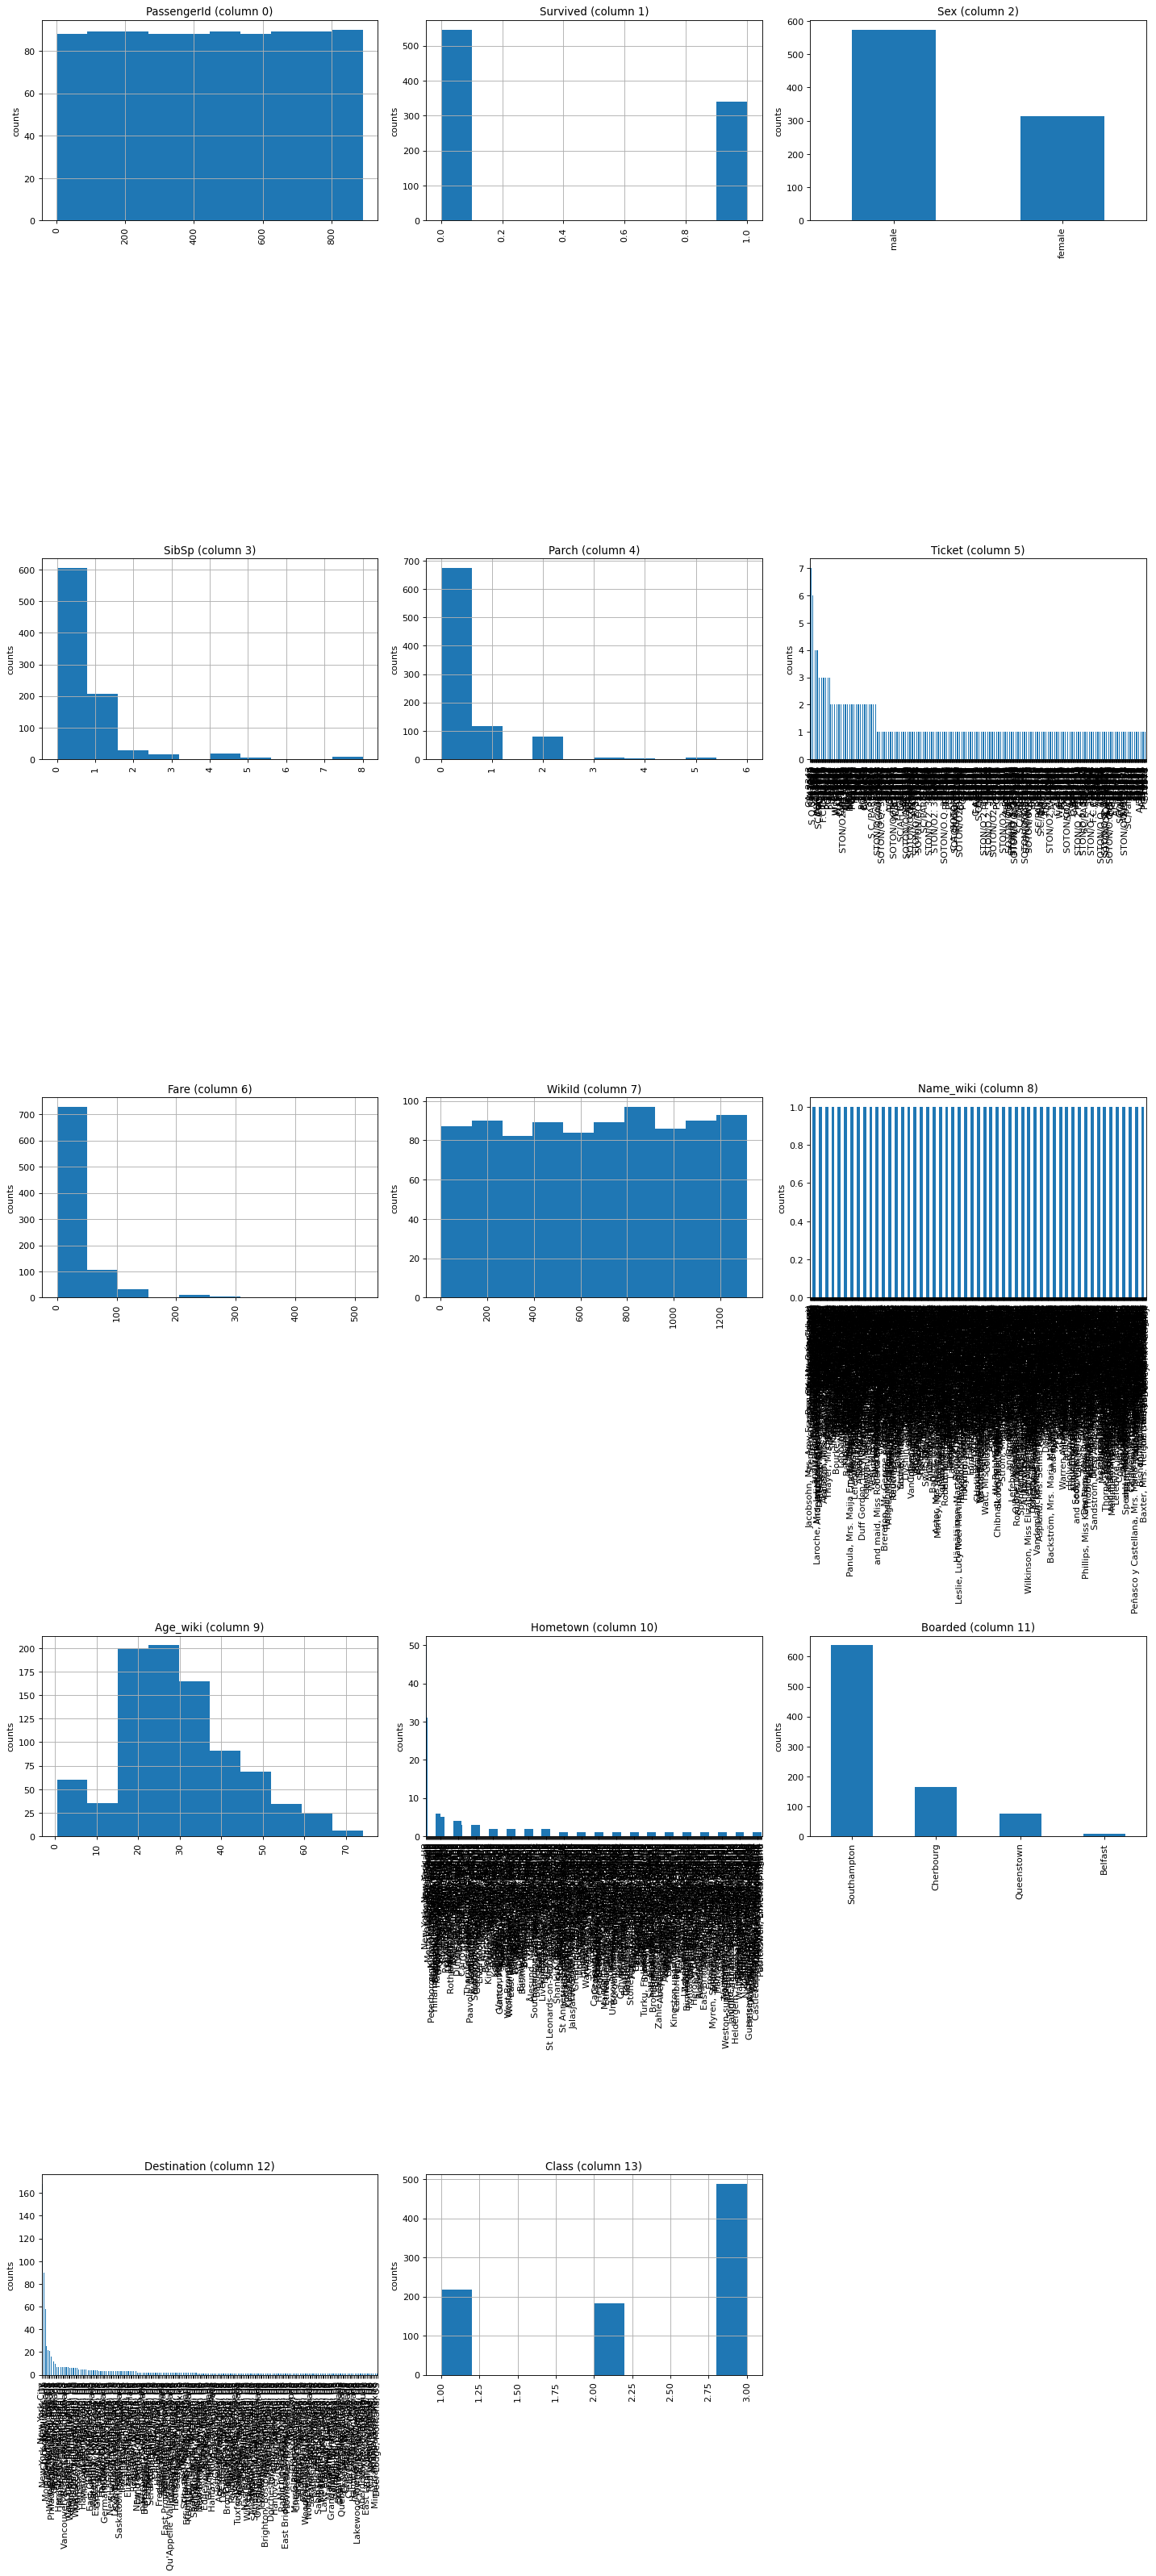

In [11]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    #df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    print("df.shape", df.shape)
    columnNames = list(df)
    nGraphRow = round((nCol + nGraphPerRow - 1) / nGraphPerRow)
    print("nCol:{} nGrapShown:{} nGraphRow:{}".format(nCol, nGraphShown, nGraphRow))
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    
plotPerColumnDistribution(df, 18, 3)

In [12]:
unhelpful_features = ['PassengerId', 'Ticket', 'WikiId', 'Name_wiki', 'Hometown', 'Boarded', 'Destination']
df = df.drop(unhelpful_features, axis=1)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    float64
 1   Sex       887 non-null    object 
 2   SibSp     887 non-null    int64  
 3   Parch     887 non-null    int64  
 4   Fare      887 non-null    float64
 5   Age_wiki  887 non-null    float64
 6   Class     887 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 55.4+ KB


,Survived,Sex,SibSp,Parch,Fare,Age_wiki,Class
0,0.0,male,1,0,7.2500,22.0,3.0
1,1.0,female,1,0,71.2833,35.0,1.0
2,1.0,female,0,0,7.9250,26.0,3.0
3,1.0,female,1,0,53.1000,35.0,1.0
4,0.0,male,0,0,8.0500,35.0,3.0


df.shape (887, 7)
nCol:7 nGrapShown:8 nGraphRow:2


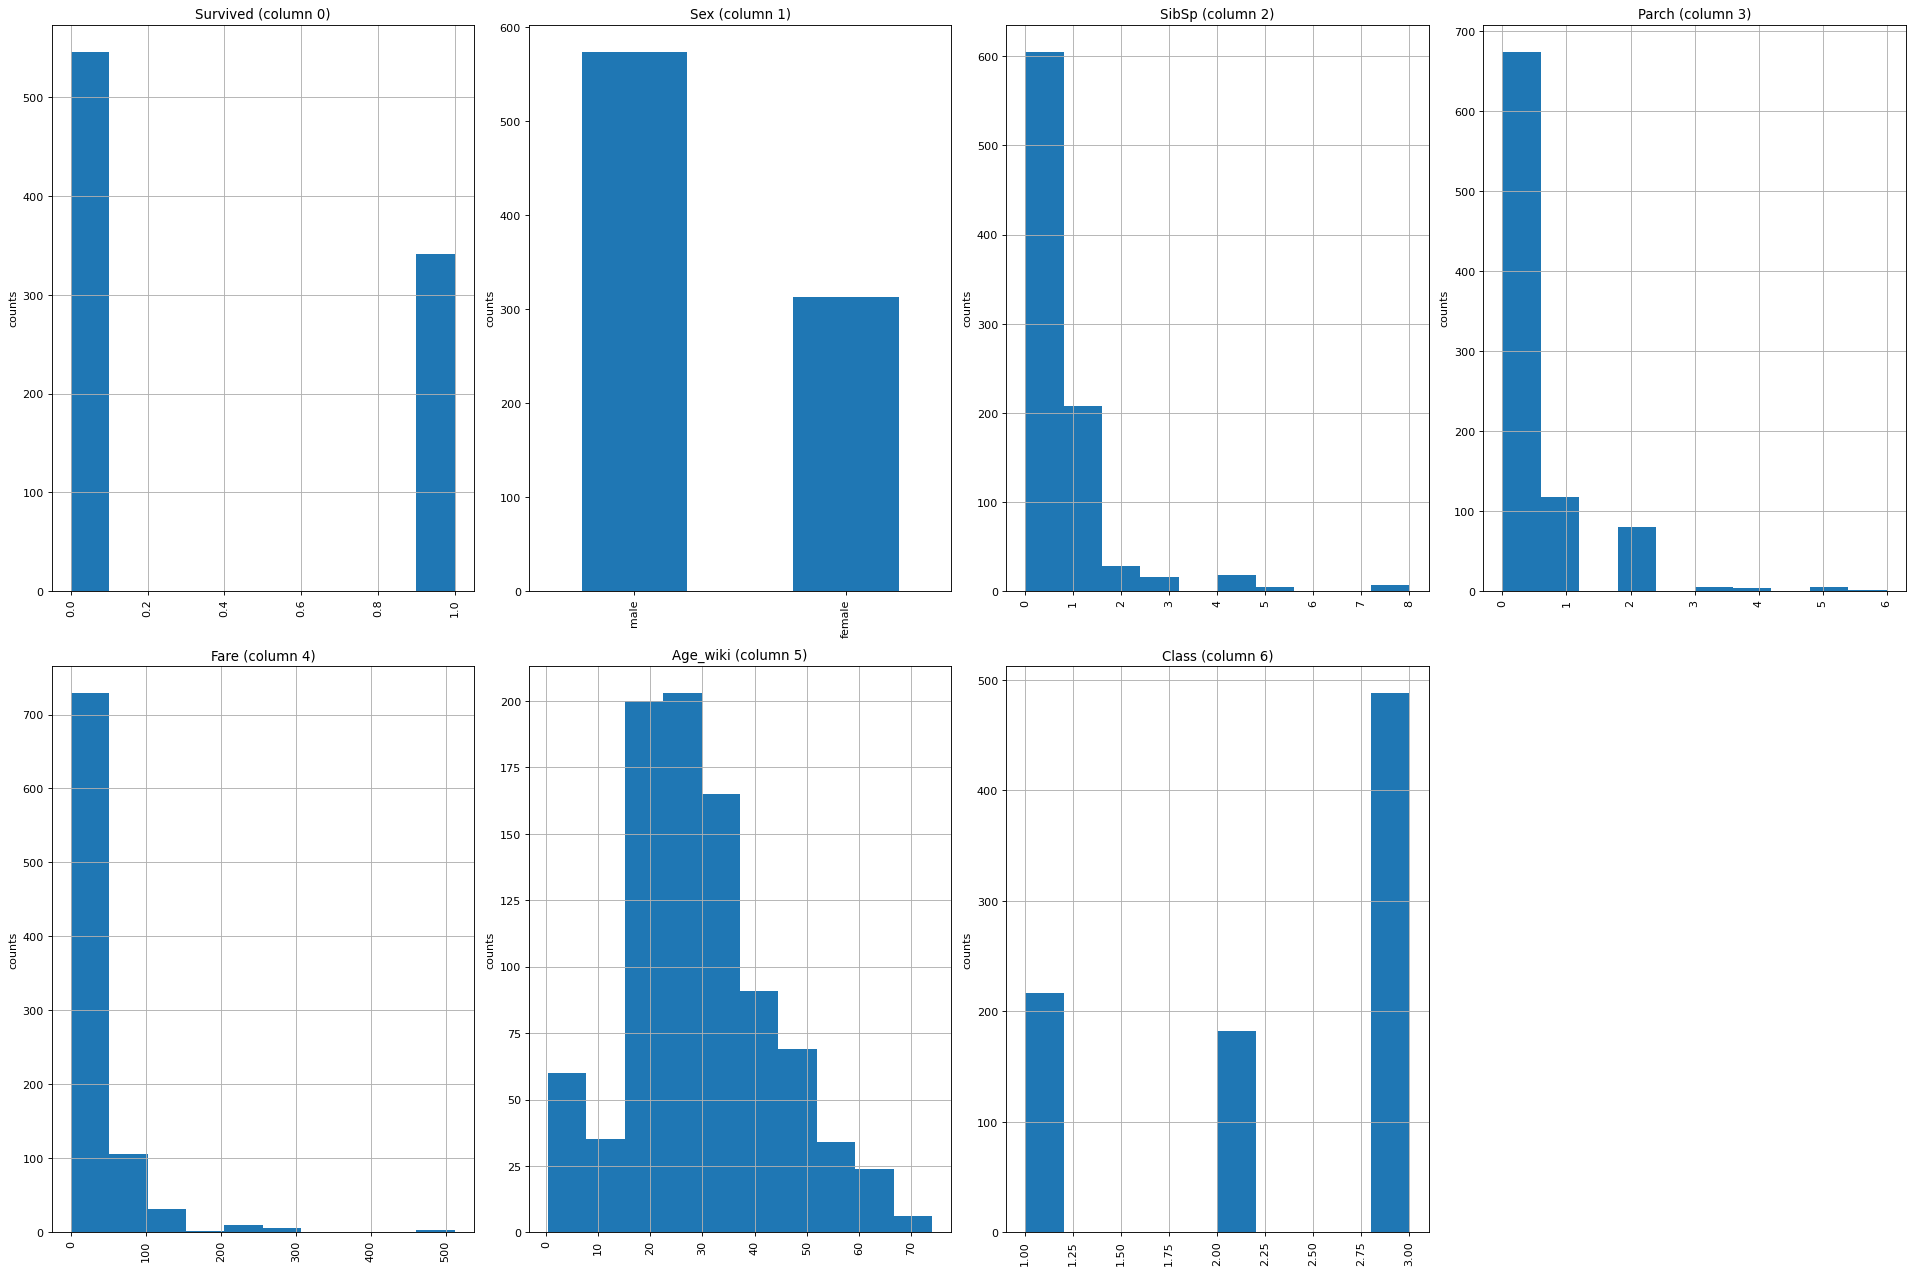

In [13]:
plotPerColumnDistribution(df, 8, 4)

## 4. EDA (Exploratory Data Analysis)

In [14]:
df.describe(include='all')

,Survived,Sex,SibSp,Parch,Fare,Age_wiki,Class
count,887.000000,887,887.000000,887.000000,887.000000,887.000000,887.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,male,NaN,NaN,NaN,NaN,NaN
freq,NaN,574,NaN,NaN,NaN,NaN,NaN
mean,0.384442,NaN,0.524239,0.383315,32.056970,29.322063,2.305524
std,0.486738,NaN,1.104694,0.807466,49.354618,13.930089,0.838010
min,0.000000,NaN,0.000000,0.000000,0.000000,0.420000,1.000000
25%,0.000000,NaN,0.000000,0.000000,7.925000,20.000000,2.000000
50%,0.000000,NaN,0.000000,0.000000,14.454200,28.000000,3.000000
75%,1.000000,NaN,1.000000,0.000000,31.000000,38.000000,3.000000


C:\Users\dengy\AppData\Local\Temp\ipykernel_41176\3629652394.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".1f")


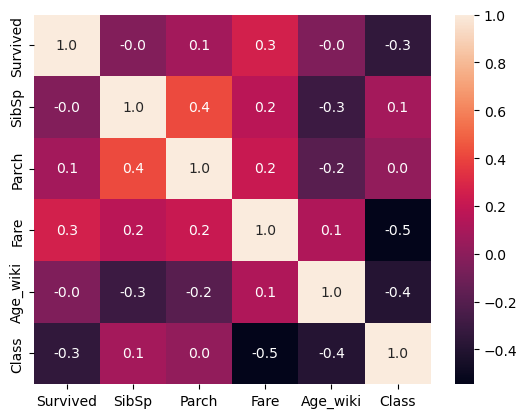

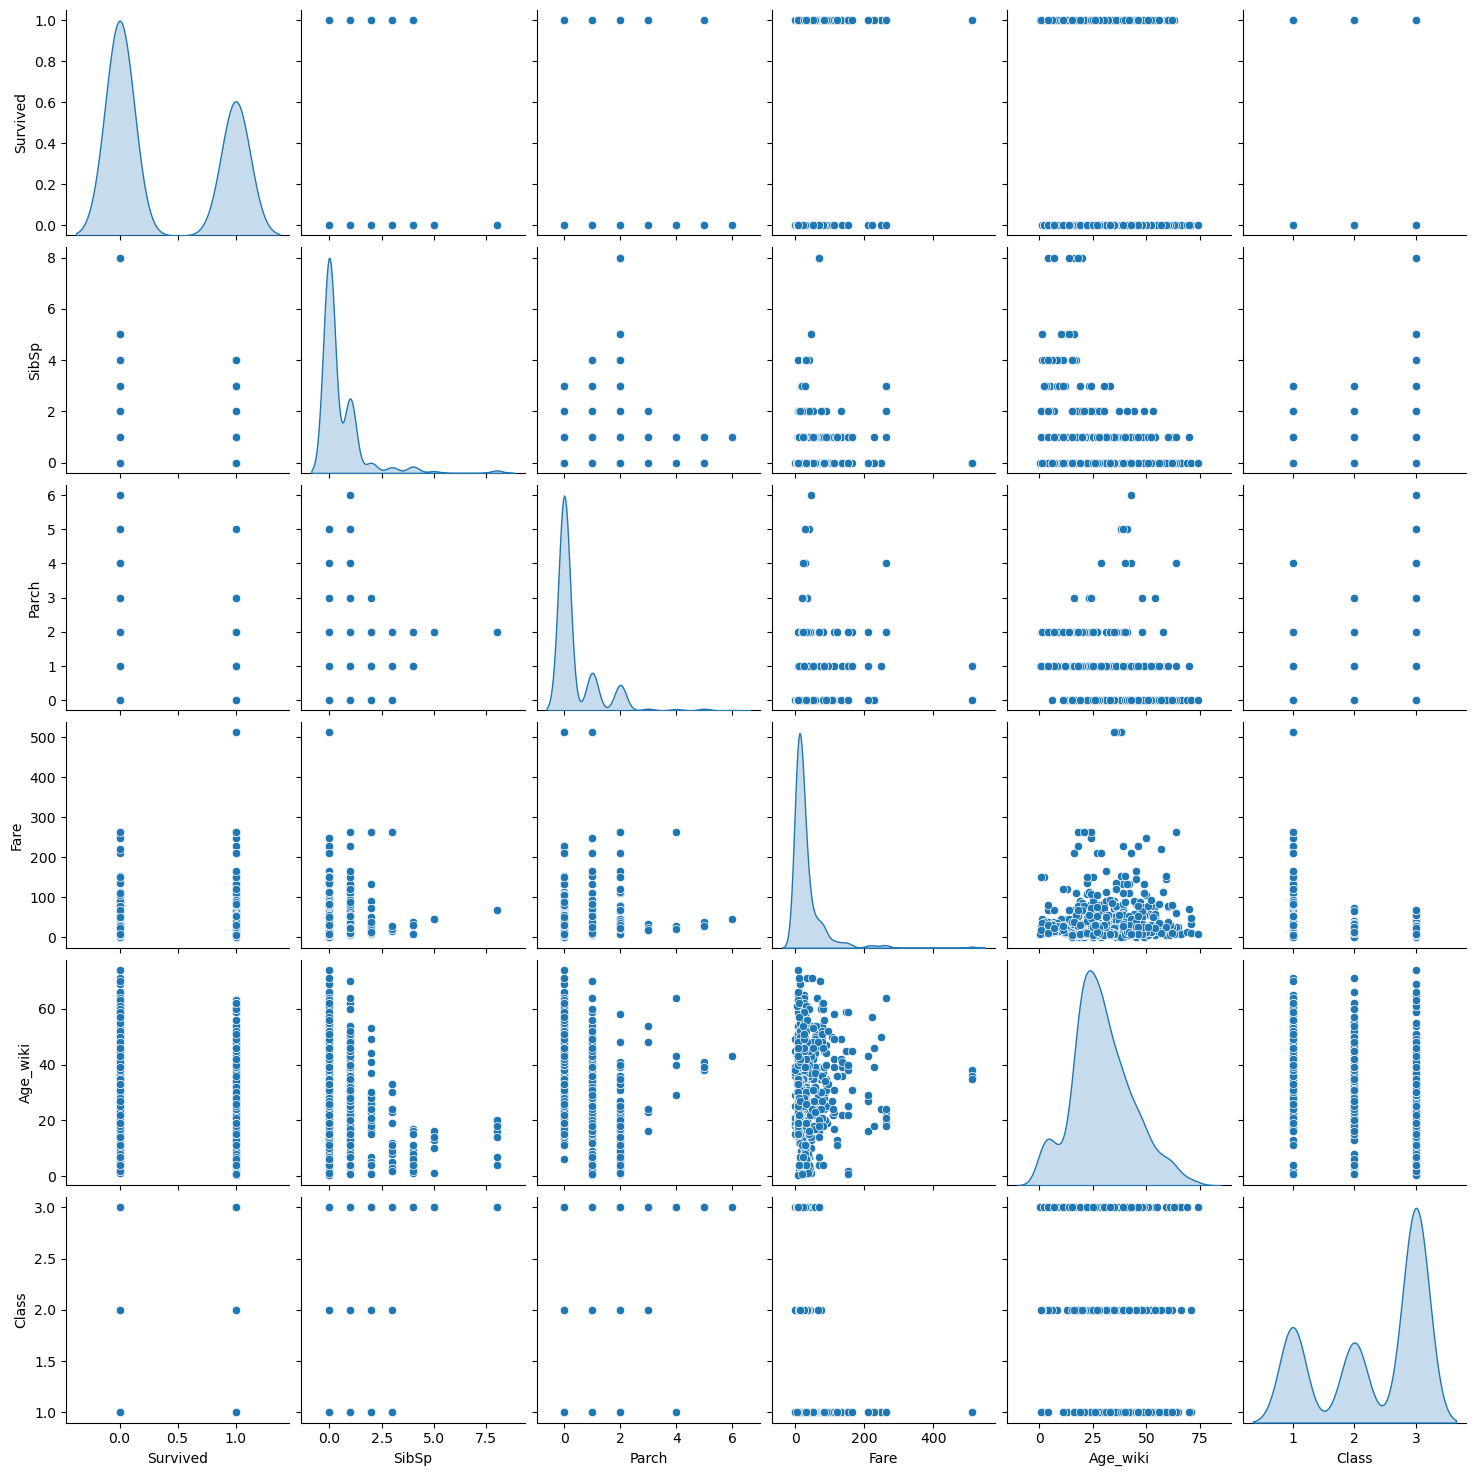

In [15]:
sns.heatmap(df.corr(), annot=True, fmt=".1f")
sns.pairplot(df, diag_kind='kde')

As the fare and class are correlated, I choose to drop class and remain fare.

In [16]:
"""df = df.drop(['Class'], axis=1)
df.info()
df.head()"""

"df = df.drop(['Class'], axis=1)\ndf.info()\ndf.head()"

In [17]:
for column_name, colume_value in df.iteritems():
    print("column:{} unique:{}".format(column_name, colume_value.unique()))

column:Survived unique:[0. 1.]
column:Sex unique:['male' 'female']
column:SibSp unique:[1 0 3 4 2 5 8]
column:Parch unique:[0 1 2 5 3 4 6]
column:Fare unique:[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55

C:\Users\dengy\AppData\Local\Temp\ipykernel_41176\768160941.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name, colume_value in df.iteritems():


Note the Dtaype of Sex is object, we need to conver it to number before feed them to trainning model.

In [18]:
df['Sex'].replace({'male':1, 'female':0}, inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    float64
 1   Sex       887 non-null    int64  
 2   SibSp     887 non-null    int64  
 3   Parch     887 non-null    int64  
 4   Fare      887 non-null    float64
 5   Age_wiki  887 non-null    float64
 6   Class     887 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 55.4 KB


,Survived,Sex,SibSp,Parch,Fare,Age_wiki,Class
0,0.0,1,1,0,7.2500,22.0,3.0
1,1.0,0,1,0,71.2833,35.0,1.0
2,1.0,0,0,0,7.9250,26.0,3.0
3,1.0,0,1,0,53.1000,35.0,1.0
4,0.0,1,0,0,8.0500,35.0,3.0


## 5. Models
## 6. Results and analysis

#### 5.1 Splite the dataset to train set and test set

In [20]:

train_data, test_data = train_test_split(
  df, random_state=0, test_size=0.2)
train_data.info()

X_train = train_data.drop(['Survived'], axis=1)
y_train = train_data['Survived']
X_test = test_data.drop(['Survived'], axis=1)
y_test = test_data['Survived']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 365 to 688
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  709 non-null    float64
 1   Sex       709 non-null    int64  
 2   SibSp     709 non-null    int64  
 3   Parch     709 non-null    int64  
 4   Fare      709 non-null    float64
 5   Age_wiki  709 non-null    float64
 6   Class     709 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 44.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 14 to 141
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  178 non-null    float64
 1   Sex       178 non-null    int64  
 2   SibSp     178 non-null    int64  
 3   Parch     178 non-null    int64  
 4   Fare      178 non-null    float64
 5   Age_wiki  178 non-null    float64
 6   Class     178 non-null    float64
dtypes: float64(4), int64(3)
memory 

### 5.2 Random Forest model

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Accuracy: {clf.score(X_test, y_test)}")

Accuracy: 0.7921348314606742


In [32]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 7, 'n_estimators': 419}


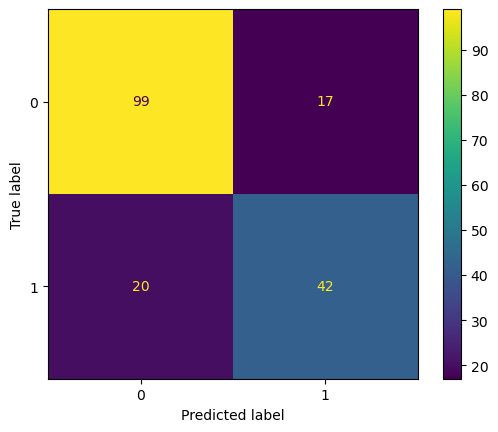

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [34]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7921348314606742
Precision: 0.711864406779661
Recall: 0.6774193548387096


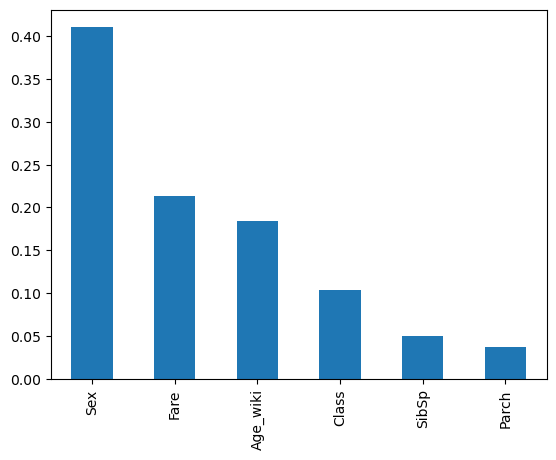

In [25]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

### 5.3 Build Logistic regression model

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    float64
 1   Sex       887 non-null    int64  
 2   SibSp     887 non-null    int64  
 3   Parch     887 non-null    int64  
 4   Fare      887 non-null    float64
 5   Age_wiki  887 non-null    float64
 6   Class     887 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 55.4 KB


In [43]:
df=pd.get_dummies(df, columns=["Class","SibSp","Parch"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 890
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   887 non-null    float64
 1   Sex        887 non-null    int64  
 2   Fare       887 non-null    float64
 3   Age_wiki   887 non-null    float64
 4   Class_1.0  887 non-null    uint8  
 5   Class_2.0  887 non-null    uint8  
 6   Class_3.0  887 non-null    uint8  
 7   SibSp_0    887 non-null    uint8  
 8   SibSp_1    887 non-null    uint8  
 9   SibSp_2    887 non-null    uint8  
 10  SibSp_3    887 non-null    uint8  
 11  SibSp_4    887 non-null    uint8  
 12  SibSp_5    887 non-null    uint8  
 13  SibSp_8    887 non-null    uint8  
 14  Parch_0    887 non-null    uint8  
 15  Parch_1    887 non-null    uint8  
 16  Parch_2    887 non-null    uint8  
 17  Parch_3    887 non-null    uint8  
 18  Parch_4    887 non-null    uint8  
 19  Parch_5    887 non-null    uint8  
 20  Parch_6   

In [44]:

train_data, test_data = train_test_split(
  df, random_state=0, test_size=0.2)
train_data.info()

X_train = train_data.drop(['Survived'], axis=1)
y_train = train_data['Survived']
X_test = test_data.drop(['Survived'], axis=1)
y_test = test_data['Survived']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 365 to 688
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   709 non-null    float64
 1   Sex        709 non-null    int64  
 2   Fare       709 non-null    float64
 3   Age_wiki   709 non-null    float64
 4   Class_1.0  709 non-null    uint8  
 5   Class_2.0  709 non-null    uint8  
 6   Class_3.0  709 non-null    uint8  
 7   SibSp_0    709 non-null    uint8  
 8   SibSp_1    709 non-null    uint8  
 9   SibSp_2    709 non-null    uint8  
 10  SibSp_3    709 non-null    uint8  
 11  SibSp_4    709 non-null    uint8  
 12  SibSp_5    709 non-null    uint8  
 13  SibSp_8    709 non-null    uint8  
 14  Parch_0    709 non-null    uint8  
 15  Parch_1    709 non-null    uint8  
 16  Parch_2    709 non-null    uint8  
 17  Parch_3    709 non-null    uint8  
 18  Parch_4    709 non-null    uint8  
 19  Parch_5    709 non-null    uint8  
 20  Parch_6 

In [46]:
LogReg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred = LogReg.predict_proba(X_test)


In [51]:
y_pred = y_pred[:,1] > 0.5

In [53]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7865168539325843
Precision: 0.6935483870967742
Recall: 0.6935483870967742


In [54]:
"""fpr, tpr, th = roc_curve(X_test, ypp[:, 1])
auc = roc_auc_score(X_test, ypp[:,1])
plt.plot(fpr, tpr, 'k-')
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), 'r--')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(0.7, 0.2, 'AUC='+"{:.3f}".format(auc))"""

'fpr, tpr, th = roc_curve(X_test, ypp[:, 1])\nauc = roc_auc_score(X_test, ypp[:,1])\nplt.plot(fpr, tpr, \'k-\')\nplt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), \'r--\')\nplt.title(\'ROC curve\')\nplt.xlabel(\'FPR\')\nplt.ylabel(\'TPR\')\nplt.text(0.7, 0.2, \'AUC=\'+"{:.3f}".format(auc))'